# Day Objectives:

## Data Preprocessing with scikit-learn
### Standardizing Data
* it rescales the data to have mean = 0 and varience(statistical measure that provides indicator of data's dispresion) = 1

* Standardization rescales data so that it has a mean of 0 and a standard deviation of 1.
* The formula for this is:  (𝑥 − 𝜇)/𝜎

    * We subtract the mean (𝜇) from each value (x) and then divide by the standard deviation (𝜎)
    
![stddata.PNG](stddata.PNG)
![std.PNG](std.PNG)

### Normalizing Data

* Want to scale the individual data observations (i.e. rows)
* when clustering data we need to apply L2 normalization to each row
* L2 normalization applied to a particular row of a data array 
* L2 norm of a row is just the square root of the sum of squared values for the row

![normal.PNG](normal.PNG)

### Robust Scaling
* Deal with is outliers (data point that is significantly further away from the other data points)
* Robustly scale the data, i.e. avoid being affected by outliers
* Scaling by using data's median and Interquartile Range (IQR)
* Here mean affected but median remains same
* Subtract the median from each data value then scale to the IQR
* y = x/2 - median and y-- 25% to 75%

## Standardizing Data

In [3]:
import pandas as pd

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/Apssdc-dataanalysis2/DataAnalysis2/master/D5_analysis%26Preproccessing/Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [18]:
mean = df["TV"].mean()
std = df["TV"].std()
mean,std

(147.0425, 85.8542363149081)

In [19]:
std_data = ( df["TV"][0] - mean ) / std
std_data

0.9674245973763037

In [20]:
from sklearn.preprocessing import scale


In [21]:
scl = scale(df)
scl

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00,
         1.55205313e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01,
        -6.96046111e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00,
        -9.07405869e-01],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00,
         8.60330287e-01],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00,
        -2.15683025e-01],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00,
        -1.31091086e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01,
        -4.27042783e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01,
        -1.58039455e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00,
        -1.77205942e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01,
        -6.57617064e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01,
        -1.04190753e+00],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00,
      

In [28]:
scl.mean(axis = 0).round(3)

array([ 0., -0.,  0., -0.])

In [26]:
scl.std(axis = 0)

array([1., 1., 1., 1.])

## Normalizing Data

In [32]:
from sklearn.preprocessing import Normalizer
norm_scale  = Normalizer()
n_res = norm_scale.fit_transform(df)
n_res

array([[0.94211621, 0.15476746, 0.28333091, 0.09048574],
       [0.59113524, 0.52205877, 0.59910561, 0.13815296],
       [0.20142628, 0.53752711, 0.81156054, 0.10891072],
       [0.89863215, 0.24497365, 0.34699657, 0.10973396],
       [0.94788063, 0.05662119, 0.30617383, 0.06763086],
       [0.09640672, 0.54187225, 0.83109241, 0.07978487],
       [0.80725471, 0.46048617, 0.32992149, 0.16566271],
       [0.97684844, 0.15928643, 0.09427156, 0.10727454],
       [0.84982063, 0.20751434, 0.09881635, 0.47431849],
       [0.99295394, 0.01292132, 0.10535848, 0.05267924],
       [0.92901149, 0.08151689, 0.34012221, 0.12086988],
       [0.99043367, 0.11071452, 0.01845242, 0.08026803],
       [0.30163094, 0.44484227, 0.83518819, 0.11659683],
       [0.98945567, 0.0771268 , 0.0730675 , 0.09843815],
       [0.95983344, 0.15472082, 0.21632699, 0.08935245],
       [0.93412001, 0.22803237, 0.25289124, 0.10708438],
       [0.49072941, 0.26490703, 0.82512025, 0.09047371],
       [0.96825675, 0.13625788,

In [33]:
n_res.min()

0.0

In [34]:
n_res.max()

0.99850701539418

## Robust Scaling

In [38]:
import numpy as np
arr1 = np.array([1,2,3,4,70,5,6,7])
arr2 = np.array([1,2.2,3.6,4,5,6,7,8])
arr1.mean(),arr2.mean()

(12.25, 4.6)

In [40]:
np.median(arr1),np.median(arr2)

(4.5, 4.5)

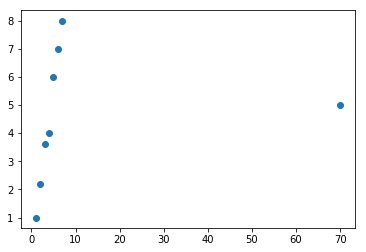

In [45]:
import matplotlib.pyplot as plt
plt.scatter(arr1,arr2)
plt.show()

In [41]:
from sklearn.preprocessing import RobustScaler
r_scale = RobustScaler()
r_scale.fit_transform(df)


array([[ 5.56247837e-01,  5.61205273e-01,  1.34312210e+00,
         1.30960854e+00],
       [-7.28625822e-01,  6.17702448e-01,  5.98145286e-01,
        -3.55871886e-01],
       [-9.17618553e-01,  8.66290019e-01,  1.34621329e+00,
        -5.12455516e-01],
       [ 1.21149187e-02,  6.93032015e-01,  1.01236476e+00,
         7.97153025e-01],
       [ 2.14953271e-01, -4.55743879e-01,  1.00927357e+00,
         0.00000000e+00],
       [-9.76462444e-01,  9.79284369e-01,  1.52241113e+00,
        -8.11387900e-01],
       [-6.38629283e-01,  3.72881356e-01, -6.95517774e-02,
        -1.56583630e-01],
       [-2.04569055e-01, -1.24293785e-01, -4.37403400e-01,
         4.27046263e-02],
       [-9.77154725e-01, -7.83427495e-01, -7.65069552e-01,
        -1.15302491e+00],
       [ 3.46486674e-01, -7.64595104e-01, -1.40649150e-01,
        -3.27402135e-01],
       [-5.79093112e-01, -6.44067797e-01, -4.79134467e-02,
        -6.12099644e-01],
       [ 4.49636552e-01,  4.14312618e-02, -6.72333849e-01,
      

In [47]:
plt.scatter?

# Cleaning data in Python 
![WorkingwithMissingData-min.png](WorkingwithMissingData-min.png)

* NaN : not a number -- special floating-point value
* Working with duplicates and missing values
    * isnull()
    * notnull()
    * dropna()
    * fillna()
    * replace()
* Which values should be replaced with missing values based on data identifying and eliminating outliers
* Dropping duplicate data

In [49]:
emp = pd.read_csv("https://raw.githubusercontent.com/Apssdc-dataanalysis2/DataAnalysis2/master/D5_analysis%26Preproccessing/employe.csv")
emp.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [51]:
emp.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [53]:
emp["First Name"].isnull().sum()

67

In [107]:
pd.isnull(emp["Gender"])

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20      True
21     False
22      True
23     False
24     False
25     False
26     False
27      True
28     False
29     False
       ...  
970    False
971    False
972     True
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982    False
983    False
984    False
985     True
986    False
987    False
988    False
989     True
990    False
991    False
992    False
993    False
994    False
995     True
996    False
997    False
998    False
999    False
Name: Gender, Length: 1000, dtype: bool

In [120]:
bool_gen = pd.isnull(emp["Gender"])
e = emp[bool_gen == True]
e.isnull().sum()
# another way
emp["Gender"].isnull().sum()

145

In [55]:
emp.notnull().sum()

First Name            933
Gender                855
Start Date           1000
Last Login Time      1000
Salary               1000
Bonus %              1000
Senior Management     933
Team                  957
dtype: int64

In [56]:
emp.shape

(1000, 8)

In [58]:
emp2 = emp.dropna() # drops all rows having null values
emp2.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal


In [59]:
emp2.shape

(764, 8)

In [75]:
emp.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [74]:
emp2.isnull().sum()

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64

In [60]:
1000-764

236

In [64]:
emp.fillna(1000000)  # it fills given value in place of null/nan

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,1000000
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
7,1000000,Female,7/20/2015,10:43 AM,45906,11.598,1000000,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18.523,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7.524,True,Business Development


In [66]:
emp["Gender"].fillna("No gender") # it fill with object

0           Male
1           Male
2         Female
3           Male
4           Male
5           Male
6         Female
7         Female
8         Female
9         Female
10        Female
11        Female
12          Male
13          Male
14        Female
15        Female
16          Male
17          Male
18        Female
19        Female
20     No gender
21          Male
22     No gender
23          Male
24          Male
25          Male
26          Male
27     No gender
28          Male
29          Male
         ...    
970       Female
971         Male
972    No gender
973         Male
974         Male
975       Female
976       Female
977       Female
978         Male
979         Male
980       Female
981         Male
982       Female
983         Male
984       Female
985    No gender
986       Female
987       Female
988       Female
989    No gender
990       Female
991       Female
992         Male
993       Female
994         Male
995    No gender
996         Male
997         Ma

In [68]:
emp["Gender"].fillna(method = "pad") # fillin values with previous ones

0        Male
1        Male
2      Female
3        Male
4        Male
5        Male
6      Female
7      Female
8      Female
9      Female
10     Female
11     Female
12       Male
13       Male
14     Female
15     Female
16       Male
17       Male
18     Female
19     Female
20     Female
21       Male
22       Male
23       Male
24       Male
25       Male
26       Male
27       Male
28       Male
29       Male
        ...  
970    Female
971      Male
972      Male
973      Male
974      Male
975    Female
976    Female
977    Female
978      Male
979      Male
980    Female
981      Male
982    Female
983      Male
984    Female
985    Female
986    Female
987    Female
988    Female
989    Female
990    Female
991    Female
992      Male
993    Female
994      Male
995      Male
996      Male
997      Male
998      Male
999      Male
Name: Gender, Length: 1000, dtype: object

In [70]:
emp["Gender"].fillna(method = "bfill")# fillin values with  next ones

0        Male
1        Male
2      Female
3        Male
4        Male
5        Male
6      Female
7      Female
8      Female
9      Female
10     Female
11     Female
12       Male
13       Male
14     Female
15     Female
16       Male
17       Male
18     Female
19     Female
20       Male
21       Male
22       Male
23       Male
24       Male
25       Male
26       Male
27       Male
28       Male
29       Male
        ...  
970    Female
971      Male
972      Male
973      Male
974      Male
975    Female
976    Female
977    Female
978      Male
979      Male
980    Female
981      Male
982    Female
983      Male
984    Female
985    Female
986    Female
987    Female
988    Female
989    Female
990    Female
991    Female
992      Male
993    Female
994      Male
995      Male
996      Male
997      Male
998      Male
999      Male
Name: Gender, Length: 1000, dtype: object

In [71]:
emp.replace(to_replace = np.nan,value = -1) # entire null data replaced by given value


,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,-1
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
7,-1,Female,7/20/2015,10:43 AM,45906,11.598,-1,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18.523,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7.524,True,Business Development


In [73]:
emp2.isnull().sum()

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64

In [89]:
dict = { "first" : [100,30,np.nan,40,56,np.nan],
        "second" : [20,30,100,89,56,45],
        "third" : [np.nan,np.nan,56,57,45,np.nan],
        "fourth": [np.nan,np.nan,np.nan,np.nan,np.nan,100]    
}
data = pd.DataFrame(dict)
data

,first,second,third,fourth
0,100.0,20,NaN,NaN
1,30.0,30,NaN,NaN
2,NaN,100,56.0,NaN
3,40.0,89,57.0,NaN
4,56.0,56,45.0,NaN
5,NaN,45,NaN,100.0


In [92]:
data.dropna(axis = 1) # drops the data have at least one missing value

,second
0,20
1,30
2,100
3,89
4,56
5,45


In [93]:
dict = { "first" : [100,30,np.nan,40,56,np.nan],
        "second" : [20,30,100,89,56,45],
        "third" : [np.nan,np.nan,56,57,45,np.nan],
        "fourth": [np.nan,np.nan,np.nan,np.nan,200,100]    
}
data = pd.DataFrame(dict)
data

,first,second,third,fourth
0,100.0,20,NaN,NaN
1,30.0,30,NaN,NaN
2,NaN,100,56.0,NaN
3,40.0,89,57.0,NaN
4,56.0,56,45.0,200.0
5,NaN,45,NaN,100.0


In [94]:
data.dropna(axis = 0) # data which have at least one missing in single row/observation

,first,second,third,fourth
4,56.0,56,45.0,200.0


## Dropping duplicate data

In [101]:
dict = { "first" : [100,30,np.nan,40,56,np.nan,np.nan],
        "second" : [20,30,100,89,56,45,45],
        "third" : [np.nan,np.nan,56,57,45,np.nan,np.nan],
        "fourth": [np.nan,np.nan,np.nan,np.nan,200,100,100]    
}
data = pd.DataFrame(dict)
data

,first,second,third,fourth
0,100.0,20,NaN,NaN
1,30.0,30,NaN,NaN
2,NaN,100,56.0,NaN
3,40.0,89,57.0,NaN
4,56.0,56,45.0,200.0
5,NaN,45,NaN,100.0
6,NaN,45,NaN,100.0


In [102]:
data.drop_duplicates()

,first,second,third,fourth
0,100.0,20,NaN,NaN
1,30.0,30,NaN,NaN
2,NaN,100,56.0,NaN
3,40.0,89,57.0,NaN
4,56.0,56,45.0,200.0
5,NaN,45,NaN,100.0


In [103]:
dict = { "first" : [100,30,np.nan,40,56,np.nan,np.nan],
        "second" : [20,30,100,89,56,45,45],
        "third" : [np.nan,np.nan,56,57,45,np.nan,np.nan],
        "fourth": [np.nan,np.nan,np.nan,np.nan,200,np.nan,100]    
}
data = pd.DataFrame(dict)
data

,first,second,third,fourth
0,100.0,20,NaN,NaN
1,30.0,30,NaN,NaN
2,NaN,100,56.0,NaN
3,40.0,89,57.0,NaN
4,56.0,56,45.0,200.0
5,NaN,45,NaN,NaN
6,NaN,45,NaN,100.0


In [104]:
data.drop_duplicates()

,first,second,third,fourth
0,100.0,20,NaN,NaN
1,30.0,30,NaN,NaN
2,NaN,100,56.0,NaN
3,40.0,89,57.0,NaN
4,56.0,56,45.0,200.0
5,NaN,45,NaN,NaN
6,NaN,45,NaN,100.0


In [105]:
data.drop_duplicates(subset = "first")

,first,second,third,fourth
0,100.0,20,NaN,NaN
1,30.0,30,NaN,NaN
2,NaN,100,56.0,NaN
3,40.0,89,57.0,NaN
4,56.0,56,45.0,200.0


:slightly_smiling_face: Hi.. everyone...!
# Task
It's time for revision and Task

:male-technologist: :female-technologist: Today's task : 

1. Load dataset -- "datasets_bird.csv"
2. cleaning data -- check missing values and find out 
    :white_check_mark:  if missing values present in numerics data then replaced with median 
    :white_check_mark:  if missing values present in categorial type data then replaced most frequent value 
3. After data Imputation Rescale data with  in range [0-1]
4. Export final dataset as "new_birds.xlsx"

